In [9]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Forecast as fc
import pickle

In [16]:
# loading data

provinces = pd.read_csv('..\data\dati-province\dpc-covid19-ita-province.csv')
today = '2021-06-26T17:00:00'
today_data = provinces.loc[provinces['data']==today]

population = pd.read_csv('..\data\Popolazione_province.csv', index_col=0)

p_list = pd.read_csv('..\data\Provinces_list.csv')['Sigla'].tolist()

# Load the coordinates from the file
with open('..\data\coordinates_dict.pickle', 'rb') as file:
    coord_df = pickle.load(file)

# Load the distances from the file
with open('..\data\distances_df.pickle', 'rb') as file:
    distances_df = pickle.load(file)


201115.92344096565

In [48]:
# Load the dictionary from the file
with open('..\data\provinces_fit.pickle', 'rb') as file:
    provinces_fitted = pickle.load(file)

selected_start=200
wave_index = [[i for i, t in enumerate(provinces_fitted[sigla].L_starts) if t>selected_start][0] for sigla in p_list]
wave_params = [ provinces_fitted[sigla].L_waves[wave_index[i]].params  for i, sigla in enumerate(p_list)]
z1 = [param['K'].value for param in wave_params]


In [53]:
# Distance matrix

D = distances_df.to_numpy()

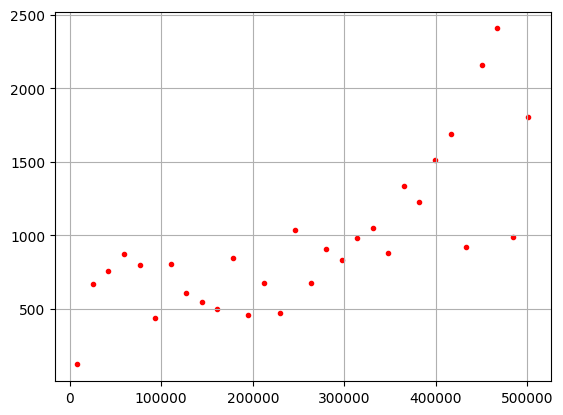

In [58]:
# Distance bins and empirical variograms

D_max = np.amax(D)
n_bins = 30
bin_edges = np.linspace(0,D_max,n_bins+1)
bin_width = bin_edges[1]-bin_edges[0]
bin_centers = np.linspace(bin_width/2,D_max-bin_width/2, n_bins)
bins = []
for k in range(n_bins):
    bin_k = []
    for i in range(n_points):
        for j in range(i+1, n_points):
            if D[i,j]>bin_edges[k] and D[i,j]<=bin_edges[k+1]:
                bin_k.append((i,j))
    bins.append(bin_k)
            
gamma = np.zeros(n_bins)
for k in range(n_bins):
    sum = 0
    for s in range(len(bins[k])):
        i = bins[k][s][0]
        j = bins[k][s][1]
        sum += (z1[i]-z1[j])**2
    gamma[k]=1/(2*len(bins[k]))*sum

plt.figure()
for k in range(n_bins):
    plt.scatter(bin_centers[k], gamma[k], color='red', marker='.')
plt.grid(True)